In [1]:
import itertools # 무한 반복자. 자바의 이터레이터같은 거인듯
import pandas as pd # 우리 판다스. 데이터 분석의 핵심!!
import numpy as np # 수학함수 전문 넘파이!!

import seaborn as sns # 시각화 라이브러리 시본!!
from sklearn import preprocessing #사이킷 런에서 원시특징 벡터를 변경하기 위한 변환기 클래스

In [2]:
df_personality = pd.read_csv("D:/추천알고리즘강의/data/personality/2018-personality-data.csv")
df_ratings = pd.read_csv("D:/추천알고리즘강의/data/personality/2018_ratings.csv")

In [3]:
# 컬럼 이름에 스페이스가 있어서 이름을 바꾸겠어!!
df_personality.keys()

Index(['userid', ' openness', ' agreeableness', ' emotional_stability',
       ' conscientiousness', ' extraversion', ' assigned metric',
       ' assigned condition', ' movie_1', ' predicted_rating_1', ' movie_2',
       ' predicted_rating_2', ' movie_3', ' predicted_rating_3', ' movie_4',
       ' predicted_rating_4', ' movie_5', ' predicted_rating_5', ' movie_6',
       ' predicted_rating_6', ' movie_7', ' predicted_rating_7', ' movie_8',
       ' predicted_rating_8', ' movie_9', ' predicted_rating_9', ' movie_10',
       ' predicted_rating_10', ' movie_11', ' predicted_rating_11',
       ' movie_12', ' predicted_rating_12', ' is_personalized',
       ' enjoy_watching '],
      dtype='object')

In [4]:
rename_dict = {' openness': 'openness', ' agreeableness': 'agreeableness', ' emotional_stability': 'emotional_stability',
               ' conscientiousness': 'conscientiousness', ' extraversion': 'extraversion', ' assigned metric': 'assigned metric',
               ' assigned condition': 'assigned condition', ' is_personalized': 'is_personalized', ' enjoy_watching ': 'enjoy_watching'}
df_personality = df_personality.rename(columns=rename_dict)

In [5]:
df_personality.keys()

Index(['userid', 'openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion', 'assigned metric',
       'assigned condition', ' movie_1', ' predicted_rating_1', ' movie_2',
       ' predicted_rating_2', ' movie_3', ' predicted_rating_3', ' movie_4',
       ' predicted_rating_4', ' movie_5', ' predicted_rating_5', ' movie_6',
       ' predicted_rating_6', ' movie_7', ' predicted_rating_7', ' movie_8',
       ' predicted_rating_8', ' movie_9', ' predicted_rating_9', ' movie_10',
       ' predicted_rating_10', ' movie_11', ' predicted_rating_11',
       ' movie_12', ' predicted_rating_12', 'is_personalized',
       'enjoy_watching'],
      dtype='object')

In [6]:
df_personality.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [7]:
df_personality

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,...,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,...,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,...,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,...,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [8]:
df_personality.describe()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,45669.233915,4.362927,50656.360414,4.322496,51791.061069,...,39458.009269,4.302993,38493.352236,4.301880,39280.998909,4.300609,38871.924755,4.302449,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,46612.744107,0.383549,46669.152356,0.378746,46172.769718,...,44511.776921,0.380281,43444.149855,0.383848,43446.111523,0.378476,43486.579385,0.378439,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.510682,1.000000,2.423497,6.000000,...,1.000000,2.483215,1.000000,2.799538,1.000000,2.375510,1.000000,2.313341,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2019.000000,4.110614,3307.750000,4.084125,3031.250000,...,1766.750000,4.049153,1302.000000,4.059146,1466.000000,4.052558,1256.000000,4.050181,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,17392.000000,4.355815,44377.000000,4.320721,48780.000000,...,7156.000000,4.307194,6964.000000,4.294702,7505.000000,4.299400,7361.000000,4.305078,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,94466.000000,4.618449,96606.000000,4.556173,95311.000000,...,84847.000000,4.545671,81847.000000,4.539686,81845.000000,4.549493,82069.000000,4.550886,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,140737.000000,6.563889,136445.000000,6.585588,141761.000000,...,140359.000000,6.606617,134853.000000,7.345432,142115.000000,6.530355,139195.000000,6.574597,5.000000,5.000000


## Label encording
#### 라벨 인코딩한데.. 비슷한 거 묶어가지고 인코딩하는거. 암호화 암호화!!!

In [9]:
assigned_metric_le = preprocessing.LabelEncoder()
assigned_metric_le.fit(df_personality["assigned metric"]) #내가 만든 모델을 학습시키는 것
df_personality["assigned metric"] = assigned_metric_le.transform(df_personality['assigned metric'])

assigned_condition_le = preprocessing.LabelEncoder()
assigned_condition_le.fit(df_personality["assigned condition"])
df_personality["assigned condition"] = assigned_condition_le.transform(df_personality["assigned condition"])

In [10]:
df_personality

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,3,1,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,0,0,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,3,3,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,2,3,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,2,3,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,2,2,108979,4.246346,...,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,3,1,93040,4.227140,...,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,3,2,106173,3.935297,...,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,3,3,6874,4.241766,...,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


## 타겟 피쳐(열)만들기
### 어떤 사용자가 어떤 범주의 영화를 가장 많이 평가하는지 예측하기 위해 Movie_choice 열을 만든다.

In [11]:
cols_predicted_rating = [' predicted_rating_1',' predicted_rating_2',' predicted_rating_3',
 ' predicted_rating_4',  ' predicted_rating_5', ' predicted_rating_6', ' predicted_rating_7', 
 ' predicted_rating_8', ' predicted_rating_9', ' predicted_rating_10', ' predicted_rating_11',' predicted_rating_12']

cols_movie = [' movie_1',' movie_2',' movie_3',' movie_4',  ' movie_5', ' movie_6', ' movie_7', 
 ' movie_8', ' movie_9', ' movie_10', ' movie_11',' movie_12']

In [12]:
df_personality[cols_predicted_rating]

,predicted_rating_1,predicted_rating_2,predicted_rating_3,predicted_rating_4,predicted_rating_5,predicted_rating_6,predicted_rating_7,predicted_rating_8,predicted_rating_9,predicted_rating_10,predicted_rating_11,predicted_rating_12
0,4.410466,4.271995,4.611922,4.459407,4.147292,4.098206,4.064843,4.149100,4.244817,4.396004,4.120456,4.053847
1,4.207280,4.266540,4.211322,4.408341,4.090358,4.202424,4.113912,4.094422,4.019599,3.963953,4.174188,4.334877
2,4.868064,4.710444,5.029360,4.698602,4.660769,4.962319,4.706864,4.645191,4.823212,4.676756,4.649281,4.744990
3,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927
4,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,4.246346,4.002232,3.981009,4.059373,3.888507,4.368495,4.554531,4.145526,4.409108,3.960470,4.178546,4.085300
1830,4.227140,4.069527,4.336292,4.091813,4.217929,4.101192,4.244278,4.473696,4.149697,4.116152,4.155210,4.045751
1831,3.935297,4.006561,3.947412,4.003978,4.002666,4.235115,4.191760,3.965657,3.998642,4.144870,3.860041,3.899857
1832,4.241766,4.350788,4.399071,4.749688,4.493639,4.397887,4.207513,4.212995,4.819710,4.059369,4.427336,4.844386


### axis = 축 axis = 0 이면 세로축 axis = 1 이면 가로축

In [13]:
df_personality["movie_choice"] = np.ndarray.argmax(df_personality[cols_predicted_rating].values, axis=1)
df_personality["movie_choice"]

0        2
1        3
2        2
3        3
4        3
        ..
1829     6
1830     7
1831     5
1832    11
1833     0
Name: movie_choice, Length: 1834, dtype: int64

In [14]:
np.argmax(df_personality[cols_predicted_rating].values, axis=1)

array([ 2,  3,  2, ...,  5, 11,  0], dtype=int64)

In [15]:
df_personality = df_personality.drop(columns=(cols_predicted_rating + cols_movie))

In [16]:
df_personality

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching,movie_choice
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,3,1,4,4,2
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,0,0,2,3,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,3,3,2,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,2,3,3,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,2,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,2,2,3,3,6
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,3,1,3,4,7
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,3,2,3,4,5
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,3,3,4,4,11


<AxesSubplot:xlabel='movie_choice', ylabel='count'>

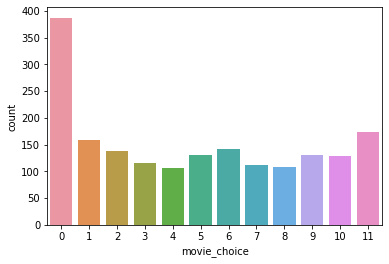

In [17]:
sns.countplot(data=df_personality, x="movie_choice")

## 실행!!
### 모델 구현 - K 인접 포인트 획득
### KDTree를 사용하여 구현

In [18]:
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
from collections import Counter # 데이터의 개수를 세는 아주 유용한 도구

## Knn클래스를 사용하여 KNN구현

### init : 생성자이고, 여기서 K값을 설정할 수 있다.
### fit : 훈련데이터를 포함한 KDTree 객체를 생성한다. 그리고 다른 데이터를 모델에 입력할 수 있다.
### predict : 입력 벡터에 대한 레이블 예측, predict_each_point함수를 호출한다.
### predict_each_point : 입력 벡터에 대한 레이블을 예측한다. K의 가장 가까운 인접 지점을 쿼리한다.
### expect_prova : 입력 벡터에 대한 레이블의 확률을 예측한다. 여러 벡터를 수용하기 위해 expect_each_prova함수를 호출한다.
### expect_each_prova : 입력 벡터에 대한 레이블의 확률을 예측한다. 로컬 공간에서 점 수를 총 점 수로 나는 값이 확률로 반환된다.

In [23]:
class Knn:
    def __init__(self, k = 3):
        self.N = 0
        self.N_k = None
        self.train_kdtree = None
        self.train_labels = None
        self.K = k

    
    def fit(self, X, y):
        self.dim = len(X[0])
        self.N = len(X)
        self.train_kdtree = KDTree(X)
        self.train_labels = y
        self.N_k = Counter(y)

    
    def predict(self, x):
        return np.array([self.predict_each_point(xi) for xi in x])
    
            
    def predict_each_point(self, x):
        _, idxs = self.train_kdtree.query(x, self.K) 
        c_K = Counter(self.train_labels[idxs])
        #most_common([n]) returns like [("key", value), ...].
        return c_K.most_common(1)[0][0] 
    
    
    def predict_proba(self, x):
        return np.array([self.predict_each_proba(xi) for xi in x])
    
    
    def predict_each_proba(self, x):
        _, idxs = self.train_kdtree.query(x, self.K)
        c_K = Counter(self.train_labels[idxs])
        p_Ck_x = {k: c_K[k]/self.K for k in self.N_k.keys()}
        p_Ck_x = [p_Ck_x[idx] for idx in sorted(p_Ck_x.keys())]
        
        return p_Ck_x


## 테스트, 훈련 데이터 스플릿

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_personality[[col for col in df_personality.columns if col not in["userid", "movie_choice"]]], df_personality["movie_choice"], test_size=0.33, random_state=42)

In [30]:
knn = Knn(30)

knn.fit(X_train.values, y_train.values)

predicts = knn.predict(X_test.values[0:10])
predict_probas = knn.predict_proba(X_test.values[0:10])

predicts

array([ 2, 10, 10,  9,  0,  0, 11,  3,  3,  1], dtype=int64)

## 타당성 검증

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neigh = KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')

neigh.fit(X_train.values, y_train.values)

predict_val = neigh.predict(X_test.values[0:10])
predict_probas_val = neigh.predict_proba(X_test.values[0:10])

predict_probas_val

array([[0.1       , 0.06666667, 0.2       , 0.06666667, 0.03333333,
        0.        , 0.16666667, 0.06666667, 0.03333333, 0.1       ,
        0.13333333, 0.03333333],
       [0.1       , 0.1       , 0.06666667, 0.06666667, 0.03333333,
        0.03333333, 0.13333333, 0.        , 0.06666667, 0.1       ,
        0.23333333, 0.06666667],
       [0.13333333, 0.06666667, 0.16666667, 0.        , 0.06666667,
        0.03333333, 0.03333333, 0.06666667, 0.        , 0.16666667,
        0.16666667, 0.1       ],
       [0.06666667, 0.03333333, 0.1       , 0.1       , 0.13333333,
        0.06666667, 0.1       , 0.06666667, 0.13333333, 0.13333333,
        0.06666667, 0.        ],
       [0.53333333, 0.1       , 0.16666667, 0.        , 0.03333333,
        0.03333333, 0.        , 0.        , 0.        , 0.03333333,
        0.03333333, 0.06666667],
       [0.3       , 0.1       , 0.06666667, 0.03333333, 0.        ,
        0.06666667, 0.03333333, 0.06666667, 0.13333333, 0.03333333,
        0.        ,